In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## Examine Wang-Landau Sampling

In [2]:
# Set to correct path
Path1 = '/workspace/Clark/RNA/LatticeChargeModel/3_state_BME/wang_landau/Dec10_results_WC_'

In [49]:
class wang_landau:
    def __init__(self,posions,WC):
        ''' Load data into data frame '''
        df = pd.DataFrame()
        conf_dict = {1:'extended',2:'bent',3:'collapsed'}
        self.conf_dict = conf_dict
        self.posions = posions
        self.WC = WC
        for ii in range(1,4):
            df1 = pd.DataFrame()
            df2 = pd.DataFrame()
            Path = Path1+WC+'/'
            energy_edges = np.loadtxt(Path+'energy_edges_'+posions+'_'+str(ii)+'.txt')
            entropy = np.loadtxt(Path+'entropy_'+posions+'_'+str(ii)+'.txt')
            # Already normalized to account for polymer charge
            df2['energy_midpoints_'+conf_dict[ii]] = (energy_edges[1:]+energy_edges[:-1]) / 2 
            df1['entropy_'+conf_dict[ii]] = entropy
            df1['g_'+conf_dict[ii]] = 100*np.exp(df1['entropy_'+conf_dict[ii]]/np.sum(df1['entropy_'+conf_dict[ii]]))
            df = pd.concat([df,df1,df2], ignore_index=False, axis=1)
            self.df = df
    def free_energy(self,conf,temperature):
        ''' Calculate free energy from density of states at various temps '''
        k = 1
        Temp = temperature
        beta = k*Temp
        Z = 0
        tmp = 0
        for idx,eng in enumerate(list(self.df['energy_midpoints_'+self.conf_dict[conf]].values)):
            tmp += eng*self.df['g_'+self.conf_dict[conf]][idx]*np.exp(-eng*beta)
            Z += self.df['g_'+self.conf_dict[conf]][idx]*np.exp(-eng*beta)
        U = tmp/Z
        F = -1/beta*np.log(Z)
        S = (U-F) / Temp
        return F,U,S
    def plot_all(self):
        ''' Plot free_energy, internal_energy, and entropy differences between conformers at various temps '''
        label = '# ions: '+self.posions +', water charge: '+self.WC
        figure_titles = ['free_energy','internal_energy','entropy']
        temperature = np.arange(0.01,10,0.05)
        S1 = np.zeros((3,len(temperature)))
        S2 = np.zeros((3,len(temperature)))
        S3 = np.zeros((3,len(temperature)))
        S_diff = np.zeros(len(temperature))
        for idx,t in enumerate(list(temperature)):
            tmp1 = self.free_energy(1,t)
            tmp2 = self.free_energy(2,t)
            tmp3 = self.free_energy(3,t)
            for jdx in range(len(tmp1)):
                S1[jdx,idx] = tmp1[jdx]
                S2[jdx,idx] = tmp2[jdx]
                S3[jdx,idx] = tmp3[jdx]
        for idx,aa in enumerate(ax):
            # Change line below to see differences
            aa.plot(temperature,S3[idx,:]-S1[idx,:],label=label)
            aa.set_ylabel(figure_titles[idx])
            aa.set_xlabel('temperature')
            aa.legend()
        Fig.set_tight_layout('tight')

In [50]:
P6W0 = wang_landau('6','0')
P6W01 = wang_landau('6','0.01')
P6W1 = wang_landau('6','0.1')

In [51]:
P12W0 = wang_landau('12','0')
P12W01 = wang_landau('12','0.01')
P12W1 = wang_landau('12','0.1')

/Users/clarkt/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


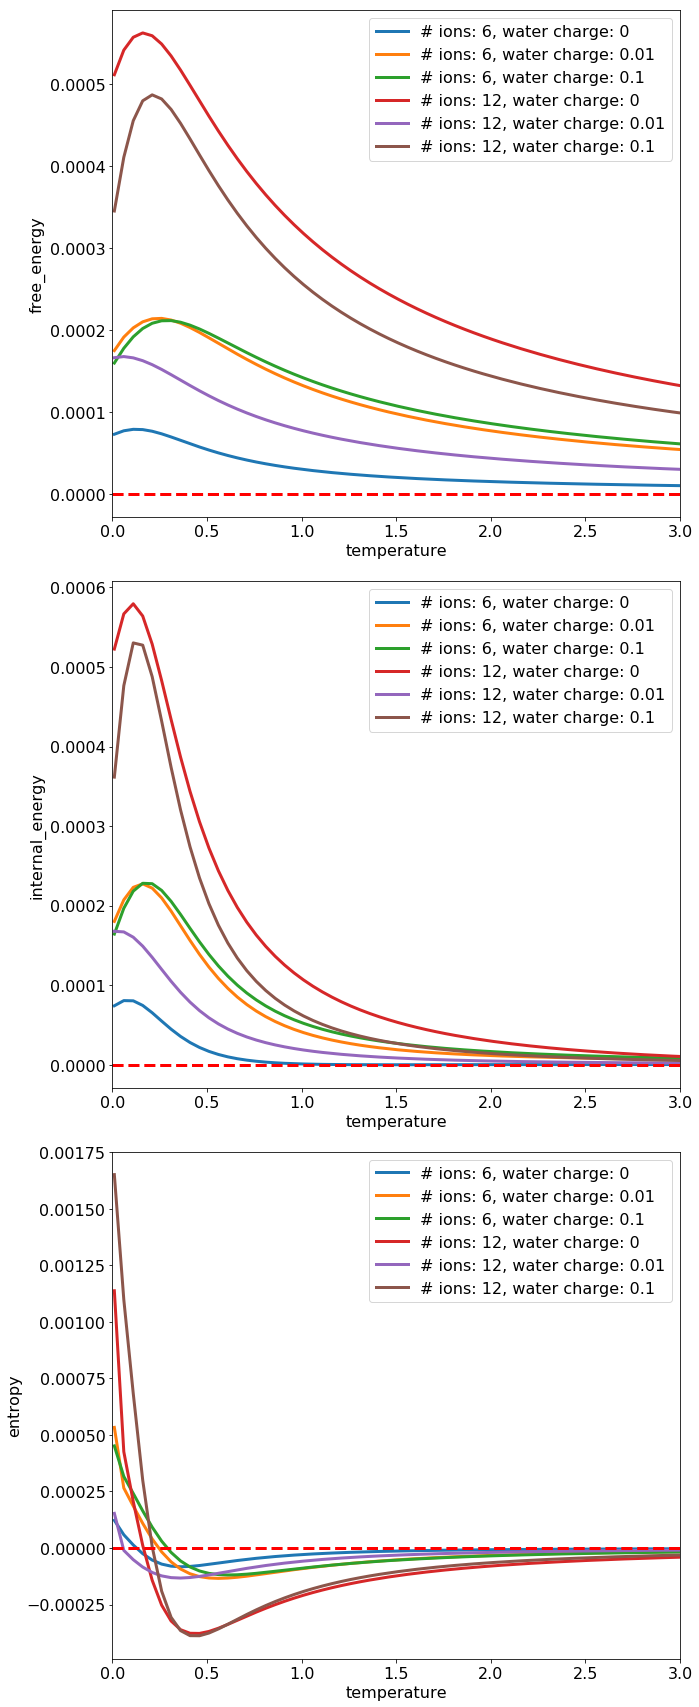

In [52]:
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 3
Fig, ax = plt.subplots(3,figsize=(10,24))
P6W0.plot_all()
P6W01.plot_all()
P6W1.plot_all()

P12W0.plot_all()
P12W01.plot_all()
P12W1.plot_all()


xs = np.linspace(0,3,50)
horiz_line_data = np.array([0 for i in range(len(xs))])
for aa in ax:
    aa.plot(xs, horiz_line_data, 'r--',label='zero') 
    aa.set_xlim(0,3)
    
Fig.set_tight_layout('tight')
# Fig.savefig('wang_landau_all.png')

In [53]:
P6W01.df.head()

,entropy_extended,g_extended,energy_midpoints_extended,entropy_bent,g_bent,energy_midpoints_bent,entropy_collapsed,g_collapsed,energy_midpoints_collapsed
0,165.171875,102.345441,-10.967325,177.482422,102.356322,-10.967325,128.078125,102.326453,-10.967325
1,165.669922,102.352596,-10.669076,178.087891,102.364454,-10.669076,128.798828,102.339696,-10.669076
2,166.378906,102.362782,-10.370827,178.572266,102.370961,-10.370827,129.294922,102.348813,-10.370827
3,167.166016,102.374091,-10.072578,179.044922,102.377311,-10.072578,129.886719,102.359689,-10.072578
4,167.630859,102.380771,-9.774329,179.611328,102.384920,-9.774329,130.271484,102.366762,-9.774329
